# Project: Investigate TMDb Movies Dataset

## Table of Contents
<ol>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ol><li><a href='#cleaning'>Data Cleaning</a></ol>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ol>

#### <a id='intro'></a>
## 1. Introduction

> 'TMDB Movies Data' is a data set that contains information about 10,000 movies including user ratings and revenue. In this analysis, I will try to answer to the following questions: 

  1. How does the profit of movies change from year to year?**
  2. What are the top 10 movies with highest and least profit?**
  3. What Are Top Genres, Cast, Directors and Production Companies in Cinema History? **  
  4. Who are Top 5 Actors who have been casted the most?**
  5. What Are the Average Runtime of Movies and how does it change over years?**
  6. What is the relationship between budget & popularity, director & popularity, cast & popularity?**
  7. What is the most Popular Keyword?**

In [232]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

<a id='wrangling'></a>
## 2. Data Wrangling

### General Properties

In [233]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')

df.shape

(10866, 21)

In [234]:
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,174799923.1,1.385749e+09


In [235]:
df.tail(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.0000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.0000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.0000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.0000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.2792,0.0


#### Observations:
>    1. There's no unit for currency; I assume it is USD (US Dollar)
>    2. There are many movies have **'0'** values on 'budget', 'revenue', 'budget_adj', 'revenue_adj' columns
>    3. The data format of 'release_date' column should be changed to Datetime Format

<a id='cleaning'></a>
## A. Data Cleaning 
> In this section, I will clean delete unnecessary columns, duplicated columns (if any) and change data type for release_date column.  

### Delete Unnecessary Columns
> First, I chose following columns, ['id','imdb__id','homepage','tagline','overview','budget_adj','revenue_adj'], to be deleted since those are not needed for this analysis. 

In [236]:
delete_col = ['id', 'imdb_id', 'homepage', 'tagline', 'overview', 'budget_adj', 'revenue_adj']
df.drop(delete_col, axis=1, inplace=True)

In [237]:
df.head(5)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


### Remove Duplicates

In [238]:
df.duplicated().sum()

1

In [239]:
df.drop_duplicates(inplace=True)

In [240]:
df.shape

(10865, 14)

### Change Datetime datatypes

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
keywords                9372 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.2+ MB


In [242]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
keywords                9372 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(6)
memory usage: 1.2+ MB


### Handling 0 values in 'budget', 'revenue', 'runtime' columns

In [244]:
row, col = df.query('budget == 0').shape
print('There are {} rows and {} columns where budget is 0'.format(row, col))

There are 5696 rows and 14 columns where budget is 0


In [245]:
row, col = df.query('revenue == 0').shape
print('There are {} rows and {} columns where revenue is 0'.format(row, col))

There are 6016 rows and 14 columns where revenue is 0


In [246]:
row, col = df.query('runtime == 0').shape
print('There are {} rows and {} columns where runtime is 0'.format(row, col))

There are 31 rows and 14 columns where runtime is 0


Now, we will convert those columns to NaN values and delete them by using 'dropna' function

In [247]:
# Create a list of budget, revenue, runtime columns
tem_col = ['budget', 'revenue', 'runtime']

# Convert all 0 values to NaN by using np.NAN
df[tem_col] = df[tem_col].replace(0, np.NAN)

# Delete/drop all NaN values
df.dropna(inplace = True)
row, col = df.shape

print('After cleaning rows and columns, we have {} rows and {} columns'.format(row, col-1))

After cleaning rows and columns, we have 3677 rows and 13 columns


In [248]:
df.isna().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3677 entries, 0 to 10848
Data columns (total 14 columns):
popularity              3677 non-null float64
budget                  3677 non-null float64
revenue                 3677 non-null float64
original_title          3677 non-null object
cast                    3677 non-null object
director                3677 non-null object
keywords                3677 non-null object
runtime                 3677 non-null float64
genres                  3677 non-null object
production_companies    3677 non-null object
release_date            3677 non-null datetime64[ns]
vote_count              3677 non-null int64
vote_average            3677 non-null float64
release_year            3677 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(2), object(6)
memory usage: 430.9+ KB


### Split Columns separted by '|' 

In [250]:
def split_col(data):
    return data.str[0:].str.split('|',expand = True)
genres = split_col(df['genres'])
cast = split_col(df['cast'])
production_companies = split_col(df['production_companies'])
genres.head()

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [251]:
cast.head()

,0,1,2,3,4
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


In [252]:
production_companies.head()

,0,1,2,3,4
0,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
2,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None
3,Lucasfilm,Truenorth Productions,Bad Robot,None,None
4,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films


<a id='eda'></a>
## 3. Exploratory Data Analysis

### Research Question 1: How does the profit of movies change from year to year?

In [253]:
#  Insert a new column for the net profit of each movie
df['net_profit'] = df['revenue'] - df['budget']

In [254]:
df.head(3)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,net_profit
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.363529e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,2.284364e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.852382e+08


In [255]:
net_profit_by_year = df.groupby('release_year').net_profit.sum()

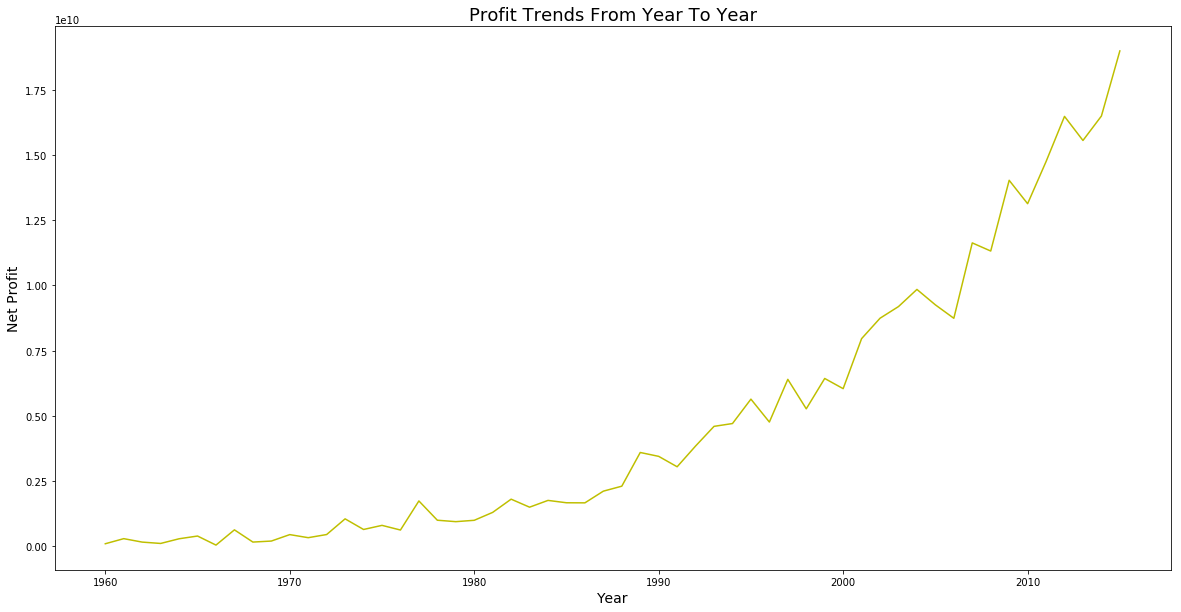

In [256]:
net_profit_by_year.plot(kind = 'line', figsize = (20,10), color = 'y')
plt.title('Profit Trends From Year To Year', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Net Profit', fontsize = 14);

> **Analysis:** The trend of net profit of movies has been gradually increasing from 1960 to 1990 and rapidly increasing from 1990 to 2015. 

### Research Question 2:  What are the Top Ten Movies that recorded that highest profits and the least profit

In [257]:
df.sort_values('net_profit', ascending=False).head(10)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,net_profit
1386,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.544506e+09
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.868178e+09
5231,4.355219,200000000.0,1.845034e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,shipwreck|iceberg|ship|panic|titanic,194.0,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,1.645034e+09
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.363529e+09
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.316249e+09
4361,7.637767,220000000.0,1.519558e+09,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,new york|shield|marvel comic|comic|superhero,143.0,Science Fiction|Action|Adventure,Marvel Studios,2012-04-25,8903,7.3,2012,1.299558e+09
3374,5.711315,125000000.0,1.327818e+09,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,self sacrifice|magic|frog|sorcerer|school,130.0,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,2011-07-07,3750,7.7,2011,1.202818e+09
14,5.944927,280000000.0,1.405036e+09,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,marvel comic|comic|sequel|superhero|vision,141.0,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,4304,7.4,2015,1.125036e+09
5422,6.112766,150000000.0,1.274219e+09,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,queen|musical|princess|betrayal|snowman,102.0,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2013-11-27,3369,7.5,2013,1.124219e+09
8094,1.136610,22000000.0,1.106280e+09,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,cheating|new identity|computer virus|chase|com...,114.0,Crime|Drama|Mystery|Thriller|Action,Columbia Pictures,1995-07-28,201,5.6,1995,1.084280e+09


>1. 'Avartar', 
>2. 'Star Wars: The Force Awakens', 
>3. 'Titanic', 
>4. 'Jurassic World', 
>5. 'Furious 7' 

    are the top 5 movies with highest profit 

Text(0, 0.5, 'Profit (USD)')

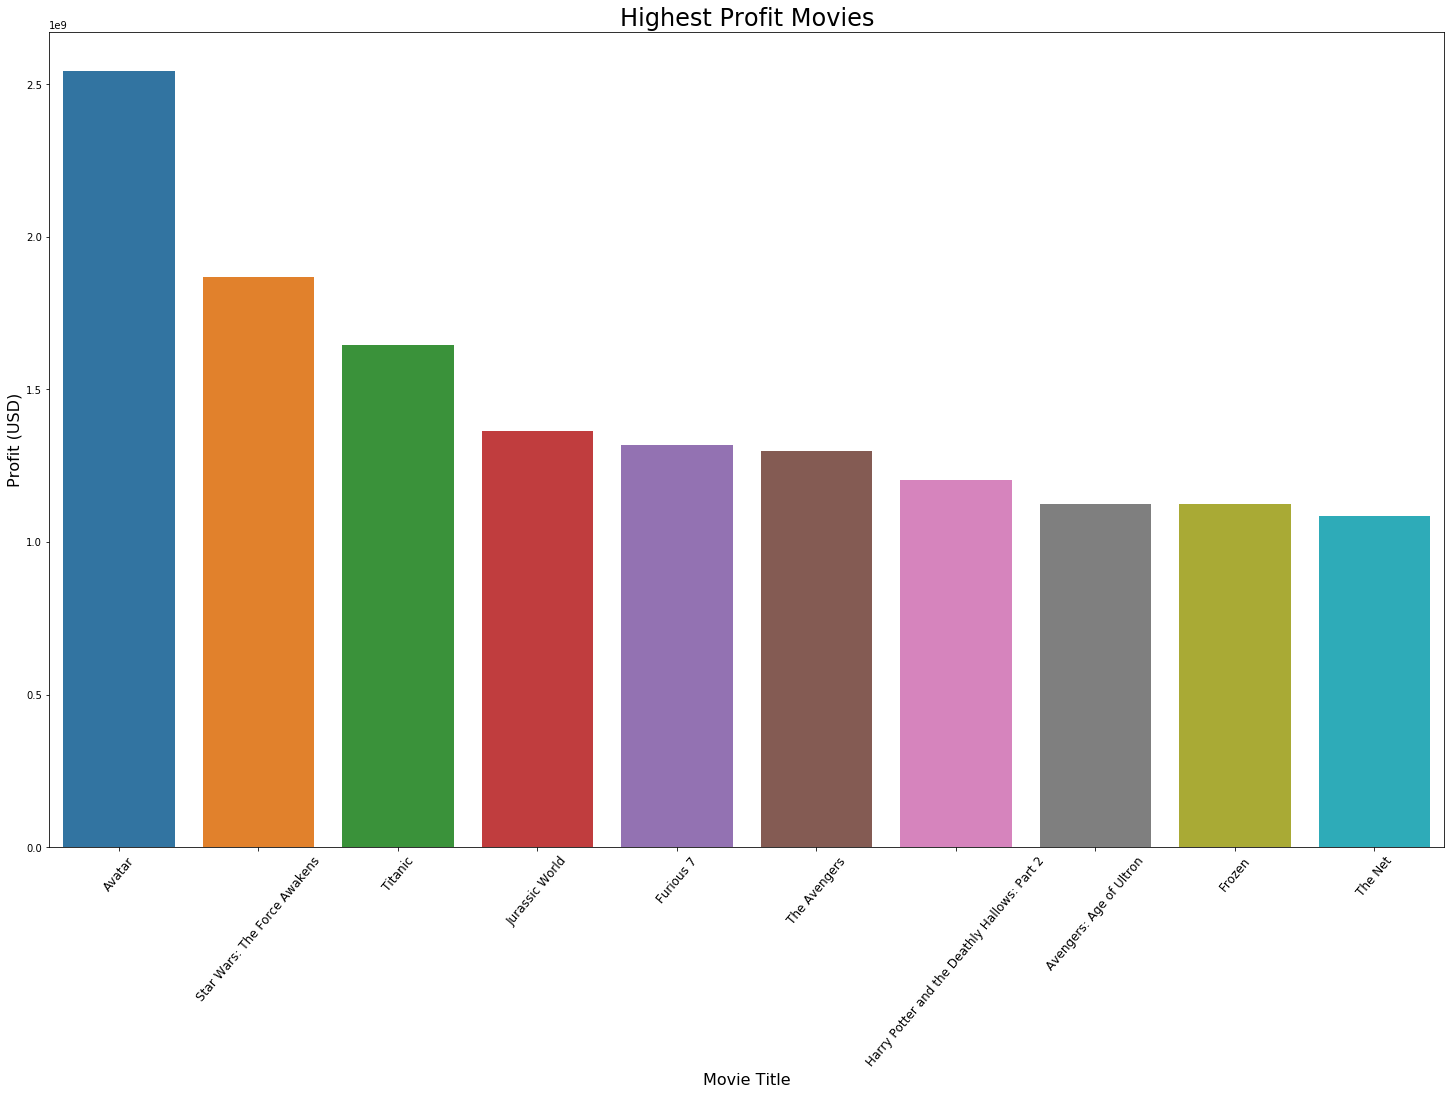

In [258]:
movies_sorted_by_profit = df.sort_values(by = 'net_profit', ascending = False)[0:10]
movies_sorted_by_profit

plt.figure(figsize= (25,15))

ax = sns.barplot(x = 'original_title' , y = 'net_profit', data = movies_sorted_by_profit) 
ax.set_xticklabels(ax.get_xticklabels(), rotation = 50, horizontalalignment = "center", fontsize = 12)

plt.title('Highest Profit Movies',fontsize = 24)
plt.xlabel('Movie Title' , fontsize = 16)
plt.ylabel('Profit (USD)' , fontsize = 16)

In [259]:
df.sort_values('net_profit', ascending=False).tail(1)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,net_profit
2244,0.25054,425000000.0,11087569.0,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,assassin|small town|revenge|deception|super speed,100.0,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,-413912431.0


'The Warrior's Way' had the lowest net_profit, -$413912431.0



In [260]:
def find_min_max(x):
    high_ind = df[x].idxmax()
    high = pd.DataFrame(df.loc[high_ind,:])
    min_ind = df[x].idxmin()
    low = pd.DataFrame(df.loc[min_ind,:])   
    print("Movie with Highest profit is: ", df['original_title'][high_ind])
    print("Movie with Lowest profit is: ", df['original_title'][min_ind])
    return pd.concat([high,low],axis = 1)

find_min_max('net_profit')

Movie with Highest profit is:  Avatar
Movie with Lowest profit is:  The Warrior's Way


,1386,2244
popularity,9.43277,0.25054
budget,2.37e+08,4.25e+08
revenue,2.78151e+09,1.10876e+07
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.


### Research Question  3. What Are Top Genres, Cast, Directors, and Production Companies in Cinema History?

In [261]:
#This function takes any column as argument and keep store values
def calculate_count(column):
    # Convert column to string and seperate it by '|'
    data = df[column].str.cat(sep = '|')
    
    # store data
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending = False)
    return count

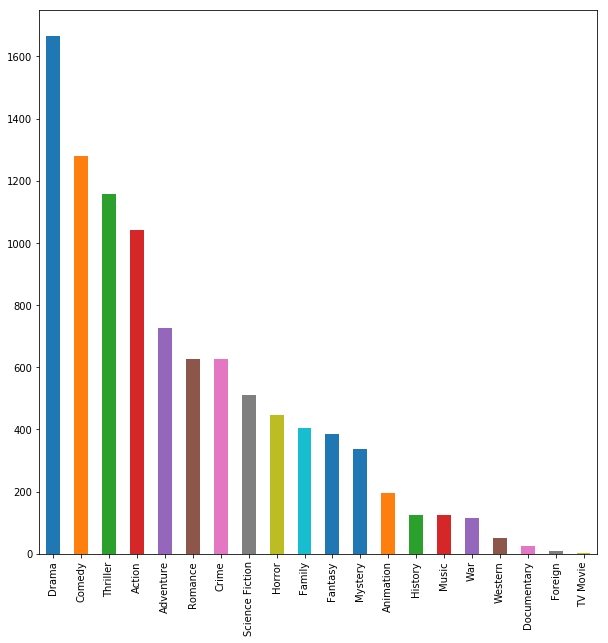

In [262]:
count_genres = calculate_count('genres')
count_genres.plot(kind='bar', figsize=(10,10))

Text(0, 0.5, 'Year')

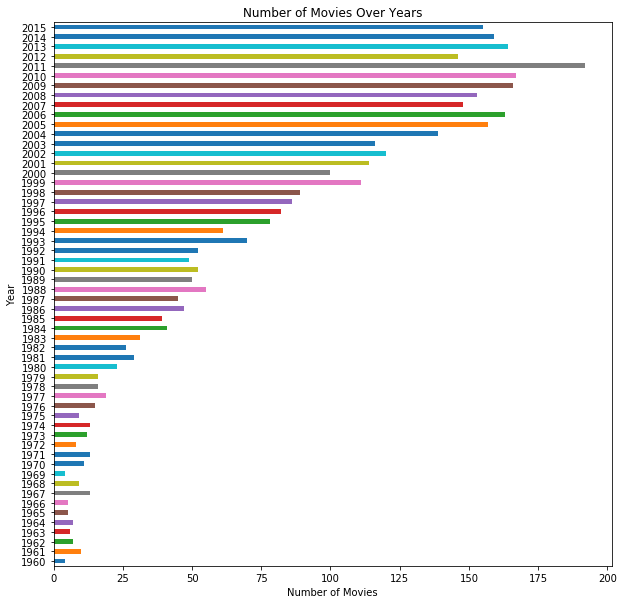

In [263]:
count_movie_year = df["release_year"].value_counts().sort_index()
count_movie_year.plot(kind='barh',title='Number of Movies Over Years', figsize=(10,10))
plt.xlabel('Number of Movies')
plt.ylabel('Year')

In [264]:
count_director = calculate_count('director')
count_director.head()

Steven Spielberg     28
Clint Eastwood       23
Ridley Scott         21
Tim Burton           17
Steven Soderbergh    17
dtype: int64

In [265]:
count_production_company = calculate_count('production_companies')
count_production_company.head()

Universal Pictures                        322
Warner Bros.                              318
Paramount Pictures                        266
Twentieth Century Fox Film Corporation    196
Columbia Pictures                         177
dtype: int64

### Research Question 4: Who are Top 5 Actors who have been casted the most?

In [266]:
count_cast = calculate_count('cast')
count_cast.head(5)

Robert De Niro       50
Bruce Willis         46
Samuel L. Jackson    43
Nicolas Cage         42
Johnny Depp          35
dtype: int64

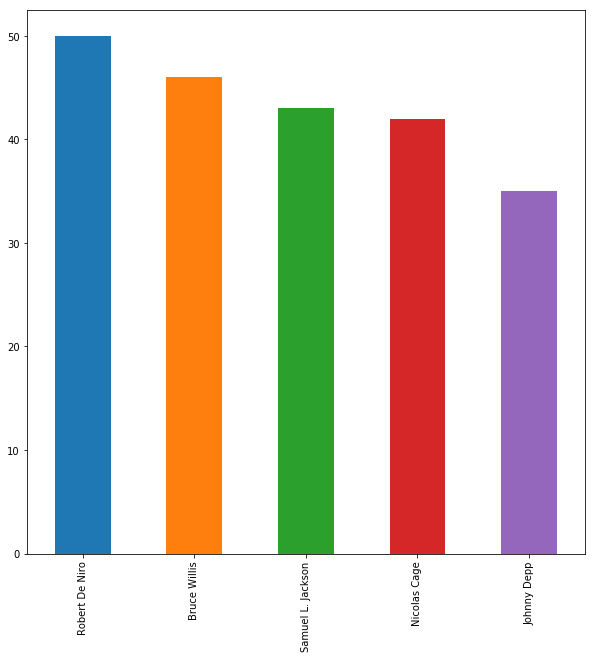

In [267]:
count_cast = calculate_count('cast')
count_cast.head(5).plot(kind='bar', figsize=(10,10))

> Top 5 Actors are Robert De Niro, Bruce Willis, Samuel L. Jackson, Nicolas Cage and Johnny Depp.

### Research Question 5: What Are the Average Runtime of Movies and How Does it Change Over Years?


In [268]:
df['runtime'].describe()

count    3677.000000
mean      109.561327
std        19.855075
min        26.000000
25%        96.000000
50%       106.000000
75%       120.000000
max       338.000000
Name: runtime, dtype: float64

Text(0, 0.5, 'Number of Movies')

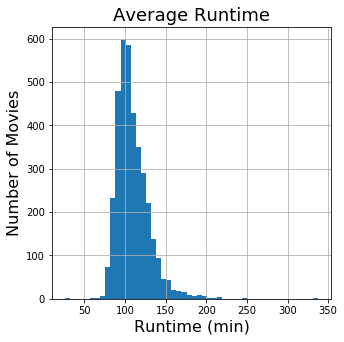

In [269]:
df['runtime'].hist(figsize=(5,5), bins=50)
plt.title('Average Runtime', fontsize=18)
plt.xlabel('Runtime (min)', fontsize=16)
plt.ylabel('Number of Movies', fontsize=16)

> Almost all movies have runtime between 80-120 min

Text(0, 0.5, 'Runtime (min)')

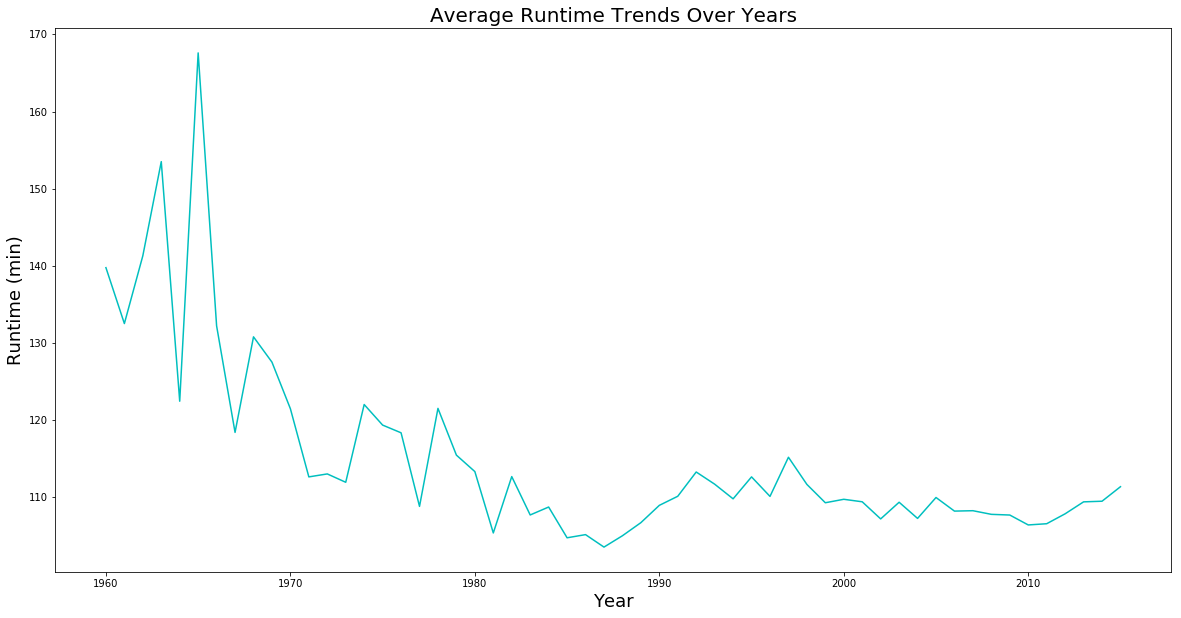

In [270]:
df.groupby('release_year').runtime.mean().plot(kind='line', figsize=(20,10), color='c')
plt.title('Average Runtime Trends Over Years', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Runtime (min)', fontsize=18)

> It's interesting to see that the average movie runtime was longer(130-170 min) during 1960-1970 and reduced to 90-110 these days

### Research Question 6. What is the Relationship Between Budget, Revenue and Popularity?

In [271]:
# compute correlation of columns
df.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,net_profit
popularity,1.000000,0.441203,0.611755,0.212153,0.777546,0.320195,0.181827,0.593061
budget,0.441203,1.000000,0.685946,0.259281,0.554653,0.021488,0.280073,0.524292
revenue,0.611755,0.685946,1.000000,0.248271,0.753014,0.228692,0.147652,0.979260
runtime,0.212153,0.259281,0.248271,1.000000,0.273912,0.357544,-0.114465,0.218346
vote_count,0.777546,0.554653,0.753014,0.273912,1.000000,0.391735,0.216831,0.726780
vote_average,0.320195,0.021488,0.228692,0.357544,0.391735,1.000000,-0.134278,0.261645
release_year,0.181827,0.280073,0.147652,-0.114465,0.216831,-0.134278,1.000000,0.094807
net_profit,0.593061,0.524292,0.979260,0.218346,0.726780,0.261645,0.094807,1.000000


>**Popularity** has stronger correlation with **revenue, vote_count** and **net_profit** 

>**Budget** has strong correlation with **revenue, vote_count, net_profit**


Text(0.5, 1.0, 'Budget vs. Revenue')

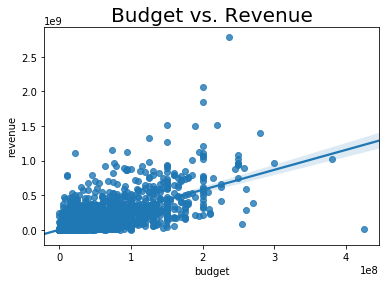

In [272]:
# create scatter plot for budget and popularity columns

sns.regplot(x=df['budget'], y=df['revenue']).set_title('Budget vs. Revenue', size=20)

Text(0.5, 1.0, 'Budget vs. Net_Profit')

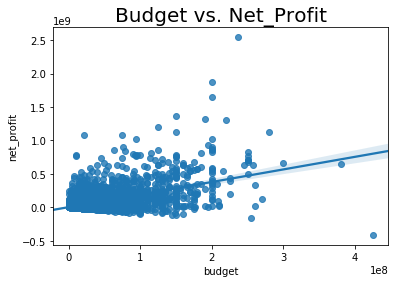

In [273]:
# create scatter plot for budget and net_profit columns
sns.regplot(x=df['budget'],y=df['net_profit']).set_title("Budget vs. Net_Profit", size=20)

> **Budget vs. Revenue** and **Budget vs. Net Profit** display strong correlation. Which means:
1. More budget will highly likely lead higher revenue 
2. More budget will result in more profit


Text(0.5, 1.0, 'Popularity vs. Vote Count')

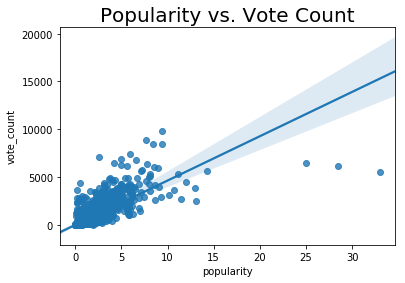

In [274]:
# create scatter plot for popularity and vote_count columns
sns.regplot(x=df['popularity'],y=df['vote_count']).set_title("Popularity vs. Vote Count",size=20)

Text(0.5, 1.0, 'Popularity vs. Net Profit')

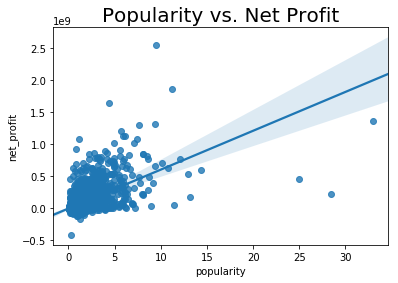

In [275]:
# create scatter plot for popularity and net_profit columns
sns.regplot(x=df['popularity'],y=df['net_profit']).set_title("Popularity vs. Net Profit",size=20)

> **Popularity vs. Vote Count** and **Popularity vs. Net Profit** clearly display strong correlation. Which means:
1. high popularity <-> high vote count 
2. high popularity <-> high net profit


### Research Question 7: What Are the Five Most Popular Keyword?


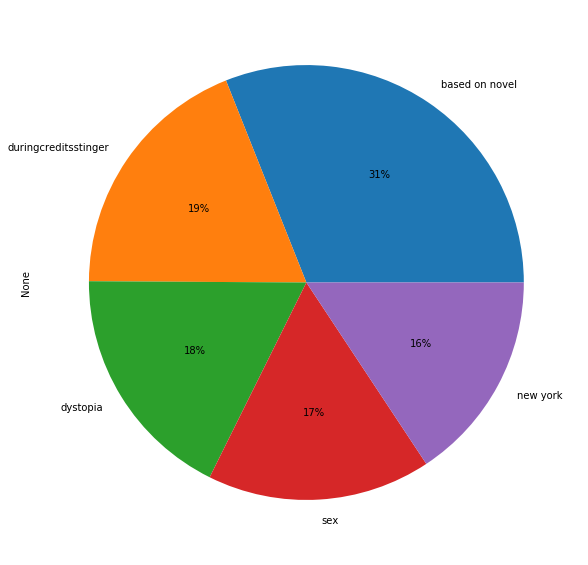

In [276]:
count_keywords = calculate_count('keywords')
count_keywords.head(5).plot(kind='pie', figsize=(10,10), autopct="%1.0f%%")

> People love to watch movies **based on novel** with **credit stinger** (a.k.a end-credit or post credit scenes) 

<a id='conclusions'></a>
## 4. Conclusions

1. According to the profit trends from 1960 to 2015, the movie industry has been gradually increasing from 1960 to 1990 and rapidly increasing from 1990 to 2015. Therefore, we can make a prediction about future that the profit will keep increasing.
2. Except Titanic (1997), the top 10 movies with highest profit is released during after 2009. This can be the fact that people are watching more movies nowadays compared to before.
3. Five most popular genres are: drama, comedy, thriller, action, adventure. These genres could be considered as guaranteed box office sellers!
4. The average runtime is about 110 min. One of the interesting findings is the average movie runtime was actually longer(130-170 min range) during 1960-1970 and reduced to 90-110 these days. In my opinion, it's becasue movie writers improved their skills on writing tight, but well-summarized stories and the developent in film technology.
5. The Top 5 Actors/Actress are Robert De Niro, Bruce Willis, Samuel L. Jackson, Nicolas Cage and Johnny Depp. They are all famous movie stars so no doubt!
6. There is also interesting findings of correlation between popularity and revenue; high popularity <-> high revenue. Apprently, there is a stronger correlation between popularity and vote count. Moreover, I found that more budget highly likely brings more net profit and revenue.
7. Lastly, keyword is one of the important factor of box office hit! Over 50% audiences are interested in watching movies based on novel and ending-credit-scenes, such as MARVEL movies, 

   ### Limitation
1. There are too much columns with 0 values. After cleaning those columns, rows reduced from 10865 to 3677. So I analyzed only 33% of the dataset. 
2. No currency unit given. So I just assumed that it's US Dollar amount. 